In [251]:
import sys
import ast
import os
from photutils.detection import DAOStarFinder
sys.path.append(os.path.abspath('../src'))
from data_processing import get_coords
from analysis import calculate_flux, magn_finder, plot_graph_var
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.time import Time
from astropy.timeseries import LombScargle
from matplotlib import pyplot as plt
from scipy.signal import detrend

In [252]:
my_path = '/home/vladislav/Education/3 курс/astro_prac/photometry_of_variable_stars/data/'


In [ ]:
get_coords(my_path, 'h', 5000, 4.0)
get_coords(my_path, 'k', 3000, 3.0)
get_coords(my_path, 'j', 2000, 4.0)

In [ ]:
get_times('/home/vladislav/Education/3 курс/astro_prac/photometry_of_variable_stars/data/','h')

dates = pd.DataFrame(data)
df_h = df_h.join(dates[['jd', 'observation_time']])

df_h = df_h.dropna()
df_h['Опорная1'] = list(zip(df_h['xОпорная1'],df_h['yОпорная1']))
df_h['Опорная2'] = list(zip(df_h['xОпорная2'],df_h['yОпорная2']))
df_h['Переменная1'] = list(zip(df_h['xПеременная1'],df_h['yПеременная1']))
df_h['Переменная2'] = list(zip(df_h['xПеременная2'],df_h['yПеременная2']))

df_h = df_h.drop(columns =['xОпорная1', 'xОпорная2', 'yОпорная1','yОпорная2',
                           'xПеременная1','xПеременная2', 'yПеременная2','yПеременная1'] )

print(df_h)
df_h.to_csv('h_filter_new.csv', index=False)

In [343]:
df_k = pd.read_csv('/home/vladislav/Education/3 курс/astro_prac/photometry_of_variable_stars/data/k_filter_new.csv')
df_j = pd.read_csv('/home/vladislav/Education/3 курс/astro_prac/photometry_of_variable_stars/data/j_filter_new.csv')
df_h = pd.read_csv('/home/vladislav/Education/3 курс/astro_prac/photometry_of_variable_stars/data/h_filter_new.csv')

our_magnit = []
our_times = []

df_h = df_h.drop(df_h.tail(7).index,
        inplace = False)

In [ ]:
for index, row in df_k.iterrows():
    num = row['Number']  # номер файла
    anchor1 = ast.literal_eval(row['Опорная1'])
    anchor2 = ast.literal_eval(row['Опорная2'])
    var1 = ast.literal_eval(row['Переменная1'])
    var2 = ast.literal_eval(row['Переменная2'])
    coords = [anchor1, anchor2, var1, var2]
    filename = '/home/vladislav/Education/3 курс/astro_prac/photometry_of_variable_stars/data/' + str('k') + '/' + str('k') + str(num) + '.fit'

    hdul = fits.open(filename)
    shot_data = hdul[0].data
    date_obs = hdul[0].header.get('DATE-OBS')
    obs_time = Time(date_obs, format='isot')
    our_times.append(obs_time.jd)
    hdul.close()
    flux = magn_finder(coords, shot_data, 7.42, 6.93, 4)
    our_magnit.append(flux)

In [ ]:
flux1, flux2 = zip(*our_magnit)

magn1 = pd.Series(flux1)
magn1.name = 'Flux1_k'
magn2 = pd.Series(flux2)
magn2.name = 'Flux2_k'
df_k = df_k.join(magn1)
df_k = df_k.join(magn2)
df_k = df_k.sort_values(by='jd')
x_times = df_k['jd'].values
y_flux2 = df_k['Flux2_k'].values
y_flux1 = df_k['Flux1_k'].values

In [ ]:
max_index = np.argmax(y_flux1)

x_times = np.delete(x_times, max_index)
y_flux1 = np.delete(y_flux1, max_index)
y_flux2 = np.delete(y_flux2, max_index)


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_times, y_flux2, label='Star2', marker='o')
plt.plot(x_times, y_flux1, label='Star1', marker='o')
plt.xlabel('Time (Julian Date)')
plt.ylabel('Magnitudes')
ax = plt.gca()
ax.yaxis.set_inverted(True)
plt.legend()
plt.grid(True)
plt.savefig('j_magnitudes.jpg')

In [ ]:
y_flux1 = detrend(y_flux1)
y_flux2 = detrend(y_flux2)

In [ ]:
ls1 = LombScargle(x_times, y_flux1)
frequency1, power1 = ls1.autopower()
print(f"False Alarm Probability: {ls1.false_alarm_probability(power1.max())}"  )
print(power1.max())
ls2 = LombScargle(x_times, y_flux2)
frequency2, power2 = ls2.autopower()
print(f"False Alarm Probability: {ls2.false_alarm_probability(power2.max())}"  )



plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frequency1, power1)
plt.title('Lomb-Scargle Periodogram for Star1')
plt.xlabel('Frequency')
plt.ylabel('Power')

plt.subplot(2, 1, 2)
plt.plot(frequency2, power2)
plt.title('Lomb-Scargle Periodogram for Star2')
plt.xlabel('Frequency')
plt.ylabel('Power')

plt.tight_layout()
plt.savefig('j_periodogram.jpg')

In [ ]:
max_power_index1 = np.argmax(power1)
max_frequency1 = frequency1[max_power_index1]
print(f"Freq: {max_frequency1},{max_power_index1}")
peak_indices = np.argsort(power1)[::-1]
second_max_index = peak_indices[1]
second_max_frequency = frequency1[second_max_index]
print(f"Freq: {second_max_frequency}"  )
max_power_index2 = np.argmax(power2)
max_frequency2 = frequency2[max_power_index2]
print(f"Freq: {max_frequency2},{max_power_index2}")

In [ ]:
print(f"Period: {1/second_max_frequency}")
print(f"Period: {1/max_frequency2}")

In [ ]:
x_times_j = df_j['jd'].values
y_flux2_j = df_j['Flux2_j'].values
y_flux1_j = df_j['Flux1_j'].values

In [ ]:
x_times_k = df_k['jd'].values
y_flux2_k = df_k['Flux2_k'].values
y_flux1_k = df_k['Flux1_k'].values

In [ ]:
x_times_h = df_h['jd'].values
y_flux2_h = df_h['Flux2_h'].values
y_flux1_h = df_h['Flux1_h'].values

In [ ]:
print(len(x_times_k),len(x_times_h),len(x_times_j))

In [ ]:

new_dataframe = df_h

In [ ]:
new_dataframe = new_dataframe.merge(df_j[['Number','Flux2_j', 'Flux1_j']], on='Number', how='left')


In [ ]:
new_dataframe = new_dataframe.merge(df_k[['Number','Flux2_k', 'Flux1_k']], on='Number', how='left')

In [ ]:
new_dataframe1 = new_dataframe

In [ ]:
new_dataframe = new_dataframe.dropna()

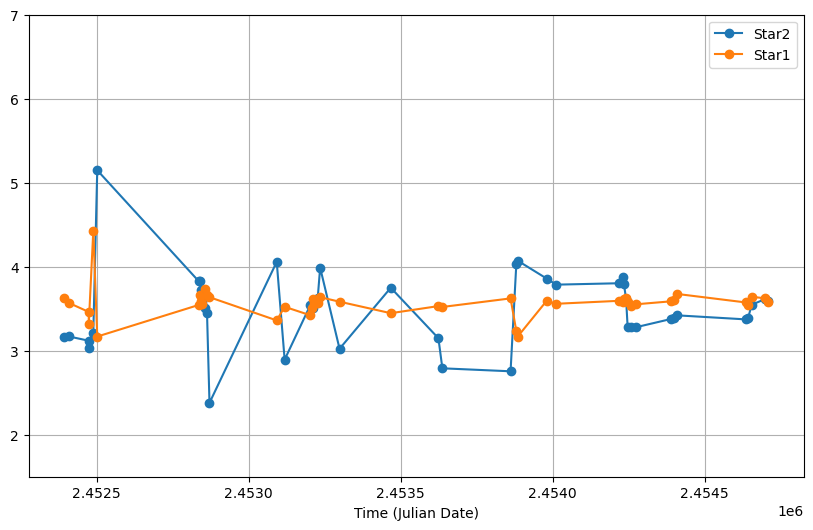

In [352]:
plt.figure(figsize=(10, 6))
plt.plot(new_dataframe['jd'], new_dataframe['Flux2_j']- new_dataframe['Flux2_h'], label='Star2', marker='o')
plt.plot(new_dataframe['jd'], new_dataframe['Flux1_j']- new_dataframe['Flux1_h'], label='Star1', marker='o')
plt.xlabel('Time (Julian Date)')
plt.ylim(1.5, 7)
# ax = plt.gca()
# ax.yaxis.set_inverted(True)
plt.legend()
plt.grid(True)
plt.savefig('j-h.jpg')

In [320]:
def calculate_flux1(image_data, center, radius):
    """
    Функция, которая считает поток в заданной круговой апертуре в заданной точке.
    """
    y, x = np.ogrid[-float(center[1]):image_data.shape[0] - float(center[1]),
           -float(center[0]):image_data.shape[1] - float(center[0])]
    mask = x ** 2 + y ** 2 <= radius ** 2
    flux = np.sum(image_data[mask])
    return flux


def magn_finder1(coords,data,anchor1_mag,anchor2_mag,radius):
    """
    Функция, которая считает звездные величины двух переменных звезд относительно
    двух опорных звезд, звездные величины которых известны заранее.
    На вход подаются координаты 4х звезд: (anch1, anch2, star1, star2)
    """
    #coords=(anch1, anch2, star1, star2)
    our_magnitudes = []

    anch1_flux = calculate_flux1(data, coords[0], radius)
    anch2_flux = calculate_flux1(data, coords[1], radius)

    our_magnitudes.append((anchor1_mag - 2.5 * np.log10( anch2_flux / anch1_flux )))
    our_magnitudes.append((anchor2_mag - 2.5 * np.log10(anch1_flux / anch2_flux )))

    return our_magnitudes

In [344]:
for index, row in df_h.iterrows():
    num = row['Number']  # номер файла
    anchor1 = ast.literal_eval(row['Опорная1'])
    anchor2 = ast.literal_eval(row['Опорная2'])
    var1 = ast.literal_eval(row['Переменная1'])
    var2 = ast.literal_eval(row['Переменная2'])
    coords = [anchor1, anchor2, var1, var2]
    filename = '/home/vladislav/Education/3 курс/astro_prac/photometry_of_variable_stars/data/' + str('h') + '/' + str('h') + str(num) + '.fit'

    hdul = fits.open(filename)
    shot_data = hdul[0].data
    date_obs = hdul[0].header.get('DATE-OBS')
    obs_time = Time(date_obs, format='isot')
    our_times.append(obs_time.jd)
    hdul.close()
    flux = magn_finder1(coords, shot_data, 7.8, 8.01, 5)
    our_magnit.append(flux)

In [345]:
flux1, flux2 = zip(*our_magnit)

magn1 = pd.Series(flux1)
magn1.name = 'Flux1'
magn2 = pd.Series(flux2)
magn2.name = 'Flux2'
df_h = df_h.join(magn1)
df_h = df_h.join(magn2)
df_h = df_h.sort_values(by='jd')
x_times = df_h['jd'].values
y_anchor2 = df_h['Flux2'].values
y_anchor1 = df_h['Flux1'].values

In [337]:

min_index = np.argmin(y_anchor1)
x_times = np.delete(x_times, min_index)
y_anchor2 = np.delete(y_anchor2, min_index)
y_anchor1 = np.delete(y_anchor1, min_index)

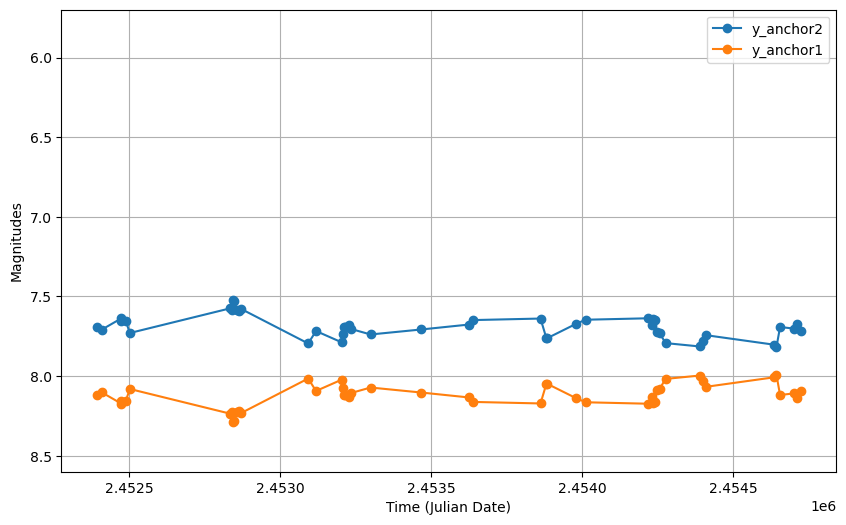

In [346]:
plt.figure(figsize=(10, 6))
plt.plot(x_times, y_anchor2, label='y_anchor2', marker='o')
plt.plot(x_times, y_anchor1, label='y_anchor1', marker='o')
plt.xlabel('Time (Julian Date)')
plt.ylabel('Magnitudes')
plt.ylim(5.7, 8.6)
ax = plt.gca()
ax.yaxis.set_inverted(True)
plt.legend()
plt.grid(True)
plt.savefig('anchor_h.jpg')